In [1]:
import pandas as pd
import xlrd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
wb= xlrd.open_workbook('SCOOP-Rating-Performance.xls')

In [3]:
ws= wb.sheet_by_index(0)

In [4]:
ws.nrows

3773

In [5]:
ipo_list =[]
for i in range(36,ws.nrows):
    if isinstance(ws.row(i)[0].value,float):
        ipo_list.append([x.value for x in ws.row(i)])

In [6]:
len(ipo_list)

3632

In [7]:
df=pd.DataFrame(ipo_list)

In [8]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,43847.0,I-Mab,IMAB,Jefferies/ CICC,14.0,14.75,12.75,-0.089286,0.75,-1.25,2.0,
1,43847.0,LIZHI,LIZI,Credit Suisse/ Citigroup,11.0,11.03,11.63,0.057273,0.03,0.63,1.0,
2,43847.0,Phoenix Tree Holdings Ltd.,DNK,Citigroup/ Credit Suisse/ J.P. Morgan,13.5,13.50,13.50,0.0,0.00,0.00,1.0,
3,43847.0,Velocity Financial,VEL,Wells Fargo Securities/ Citigroup/ JMP Securities,13.0,13.85,13.51,0.039231,0.85,0.51,1.0,
4,43854.0,Gores Holdings IV,GHIVU,Deutsche Bank Securities,10.0,10.52,10.45,0.045,0.52,0.45,1.0,


In [9]:
df.columns=['Date','Company','Ticker','Managers','Offer Price','Opening Price','1st Day Close','1st Day % Chg','$ Chg Open','$ Chg Close','Star Rating','Performed']

In [10]:
df.head()

,Date,Company,Ticker,Managers,Offer Price,Opening Price,1st Day Close,1st Day % Chg,$ Chg Open,$ Chg Close,Star Rating,Performed
0,43847.0,I-Mab,IMAB,Jefferies/ CICC,14.0,14.75,12.75,-0.089286,0.75,-1.25,2.0,
1,43847.0,LIZHI,LIZI,Credit Suisse/ Citigroup,11.0,11.03,11.63,0.057273,0.03,0.63,1.0,
2,43847.0,Phoenix Tree Holdings Ltd.,DNK,Citigroup/ Credit Suisse/ J.P. Morgan,13.5,13.50,13.50,0.0,0.00,0.00,1.0,
3,43847.0,Velocity Financial,VEL,Wells Fargo Securities/ Citigroup/ JMP Securities,13.0,13.85,13.51,0.039231,0.85,0.51,1.0,
4,43854.0,Gores Holdings IV,GHIVU,Deutsche Bank Securities,10.0,10.52,10.45,0.045,0.52,0.45,1.0,


In [11]:
def to_date(x):
    return xlrd.xldate.xldate_as_datetime(x,wb.datemode)
df['Date']=df['Date'].apply(to_date)
df.head()

,Date,Company,Ticker,Managers,Offer Price,Opening Price,1st Day Close,1st Day % Chg,$ Chg Open,$ Chg Close,Star Rating,Performed
0,2020-01-17,I-Mab,IMAB,Jefferies/ CICC,14.0,14.75,12.75,-0.089286,0.75,-1.25,2.0,
1,2020-01-17,LIZHI,LIZI,Credit Suisse/ Citigroup,11.0,11.03,11.63,0.057273,0.03,0.63,1.0,
2,2020-01-17,Phoenix Tree Holdings Ltd.,DNK,Citigroup/ Credit Suisse/ J.P. Morgan,13.5,13.50,13.50,0.0,0.00,0.00,1.0,
3,2020-01-17,Velocity Financial,VEL,Wells Fargo Securities/ Citigroup/ JMP Securities,13.0,13.85,13.51,0.039231,0.85,0.51,1.0,
4,2020-01-24,Gores Holdings IV,GHIVU,Deutsche Bank Securities,10.0,10.52,10.45,0.045,0.52,0.45,1.0,


In [12]:
df['Year'],df['Month'],df['Day'],df['Day of Week']= df['Date'].dt.year, df['Date'].dt.month, df['Date'].dt.day,df['Date'].dt.weekday

In [13]:
df.head()

,Date,Company,Ticker,Managers,Offer Price,Opening Price,1st Day Close,1st Day % Chg,$ Chg Open,$ Chg Close,Star Rating,Performed,Year,Month,Day,Day of Week
0,2020-01-17,I-Mab,IMAB,Jefferies/ CICC,14.0,14.75,12.75,-0.089286,0.75,-1.25,2.0,,2020,1,17,4
1,2020-01-17,LIZHI,LIZI,Credit Suisse/ Citigroup,11.0,11.03,11.63,0.057273,0.03,0.63,1.0,,2020,1,17,4
2,2020-01-17,Phoenix Tree Holdings Ltd.,DNK,Citigroup/ Credit Suisse/ J.P. Morgan,13.5,13.50,13.50,0.0,0.00,0.00,1.0,,2020,1,17,4
3,2020-01-17,Velocity Financial,VEL,Wells Fargo Securities/ Citigroup/ JMP Securities,13.0,13.85,13.51,0.039231,0.85,0.51,1.0,,2020,1,17,4
4,2020-01-24,Gores Holdings IV,GHIVU,Deutsche Bank Securities,10.0,10.52,10.45,0.045,0.52,0.45,1.0,,2020,1,24,4


In [14]:
by_year_cnt = df.groupby('Year')[['Ticker']].count()
by_year_cnt

,Ticker
Year,
2000,237
2001,94
2002,82
2003,80
2004,233
2005,226
2006,237
2007,256
2008,47


In [15]:
#Dropping penny stocks
df.drop(df[df['Offer Price']<5].index, inplace=True)
df.reset_index(drop=True,inplace=True)
df.head()

,Date,Company,Ticker,Managers,Offer Price,Opening Price,1st Day Close,1st Day % Chg,$ Chg Open,$ Chg Close,Star Rating,Performed,Year,Month,Day,Day of Week
0,2020-01-17,I-Mab,IMAB,Jefferies/ CICC,14.0,14.75,12.75,-0.089286,0.75,-1.25,2.0,,2020,1,17,4
1,2020-01-17,LIZHI,LIZI,Credit Suisse/ Citigroup,11.0,11.03,11.63,0.057273,0.03,0.63,1.0,,2020,1,17,4
2,2020-01-17,Phoenix Tree Holdings Ltd.,DNK,Citigroup/ Credit Suisse/ J.P. Morgan,13.5,13.50,13.50,0.0,0.00,0.00,1.0,,2020,1,17,4
3,2020-01-17,Velocity Financial,VEL,Wells Fargo Securities/ Citigroup/ JMP Securities,13.0,13.85,13.51,0.039231,0.85,0.51,1.0,,2020,1,17,4
4,2020-01-24,Gores Holdings IV,GHIVU,Deutsche Bank Securities,10.0,10.52,10.45,0.045,0.52,0.45,1.0,,2020,1,24,4


In [16]:
df.dtypes

Date             datetime64[ns]
Company                  object
Ticker                   object
Managers                 object
Offer Price             float64
Opening Price           float64
1st Day Close           float64
1st Day % Chg            object
$ Chg Open              float64
$ Chg Close             float64
Star Rating              object
Performed                object
Year                      int32
Month                     int32
Day                       int32
Day of Week               int32
dtype: object

In [17]:
df['1st Day % Chg']=df['1st Day % Chg'].astype(float)
df.dtypes

Date             datetime64[ns]
Company                  object
Ticker                   object
Managers                 object
Offer Price             float64
Opening Price           float64
1st Day Close           float64
1st Day % Chg           float64
$ Chg Open              float64
$ Chg Close             float64
Star Rating              object
Performed                object
Year                      int32
Month                     int32
Day                       int32
Day of Week               int32
dtype: object

# Analyzing the data: exploratory

Text(0.5, 1.02, 'IPO Count by Year')

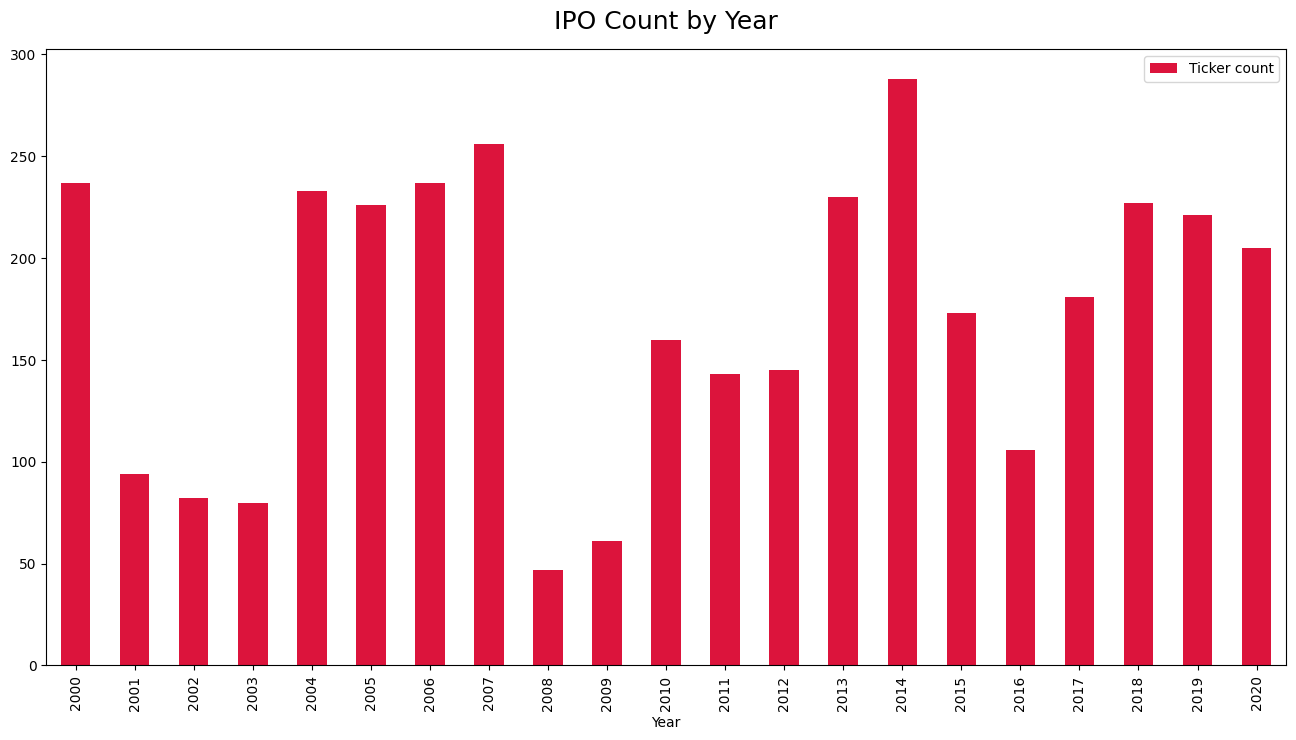

In [18]:
fig, ax = plt.subplots(figsize=(16,8))
by_year_cnt.plot(kind='bar',ax=ax,color='crimson')
ax.legend(['Ticker count'])
ax.set_title('IPO Count by Year',fontdict={'size':18},y=1.02)

In [19]:
#summarizing performance of stocks
summary_by_year = df.groupby('Year')['1st Day % Chg'].describe()
summary_by_year

,count,mean,std,min,25%,50%,75%,max
Year,,,,,,,,
2000,237.0,0.355621,0.557065,-0.269231,0.004464,0.162500,0.470052,2.775000
2001,93.0,0.130180,0.160606,-0.140625,0.011538,0.088542,0.229167,0.766667
2002,82.0,0.072315,0.141903,-0.330769,0.000000,0.045959,0.135866,0.666667
2003,79.0,0.120958,0.164613,-0.155455,0.002857,0.074286,0.230264,0.885556
2004,233.0,0.107347,0.165334,-0.142500,0.000000,0.052083,0.169231,1.036364
2005,226.0,0.099110,0.274405,-0.164000,0.000000,0.025357,0.143803,3.538519
2006,236.0,0.099694,0.176282,-0.295455,0.000000,0.041652,0.150852,1.254068
2007,256.0,0.115215,0.206049,-0.269091,0.000000,0.033571,0.179853,0.972222
2008,47.0,0.023182,0.134953,-0.199200,-0.034857,0.000000,0.028873,0.575000


Text(0.5, 1.02, 'Mean First Day Percentage Change by Year')

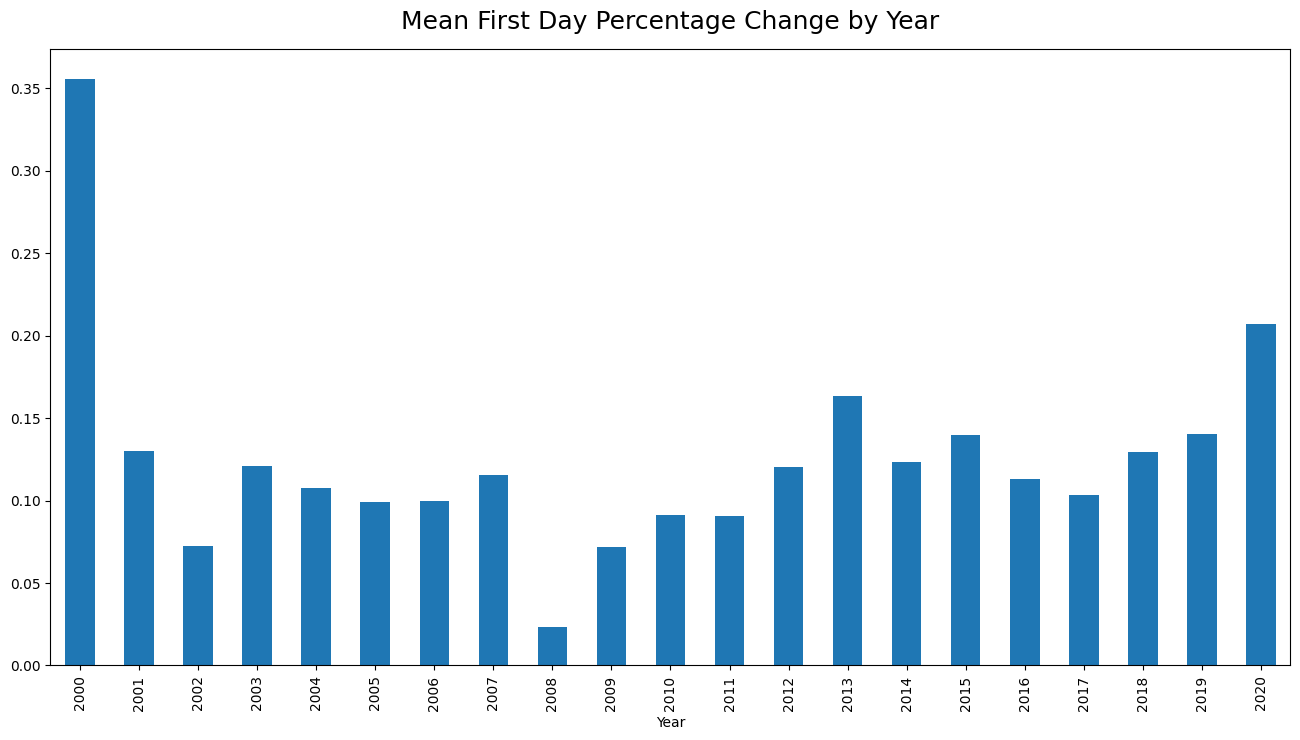

In [20]:
fig, ax = plt.subplots(figsize=(16,8))
summary_by_year['mean'].plot(kind='bar',ax=ax)
ax.set_title('Mean First Day Percentage Change by Year',fontdict={'size':18},y=1.02)

In [21]:
# adding a feature to see the change from opening to close price
df['1st Day Open to Close $ Chg']=(df['1st Day Close']-df['Opening Price'])/df['Opening Price']
df['1st Day Open to Close $ Chg'].describe()

count    3602.000000
mean        0.013316
std         0.115647
min        -0.492812
25%        -0.028618
50%         0.000000
75%         0.038282
max         2.173653
Name: 1st Day Open to Close $ Chg, dtype: float64

Text(0.5, 1.02, 'Mean First Day Open to Close % Change by Year')

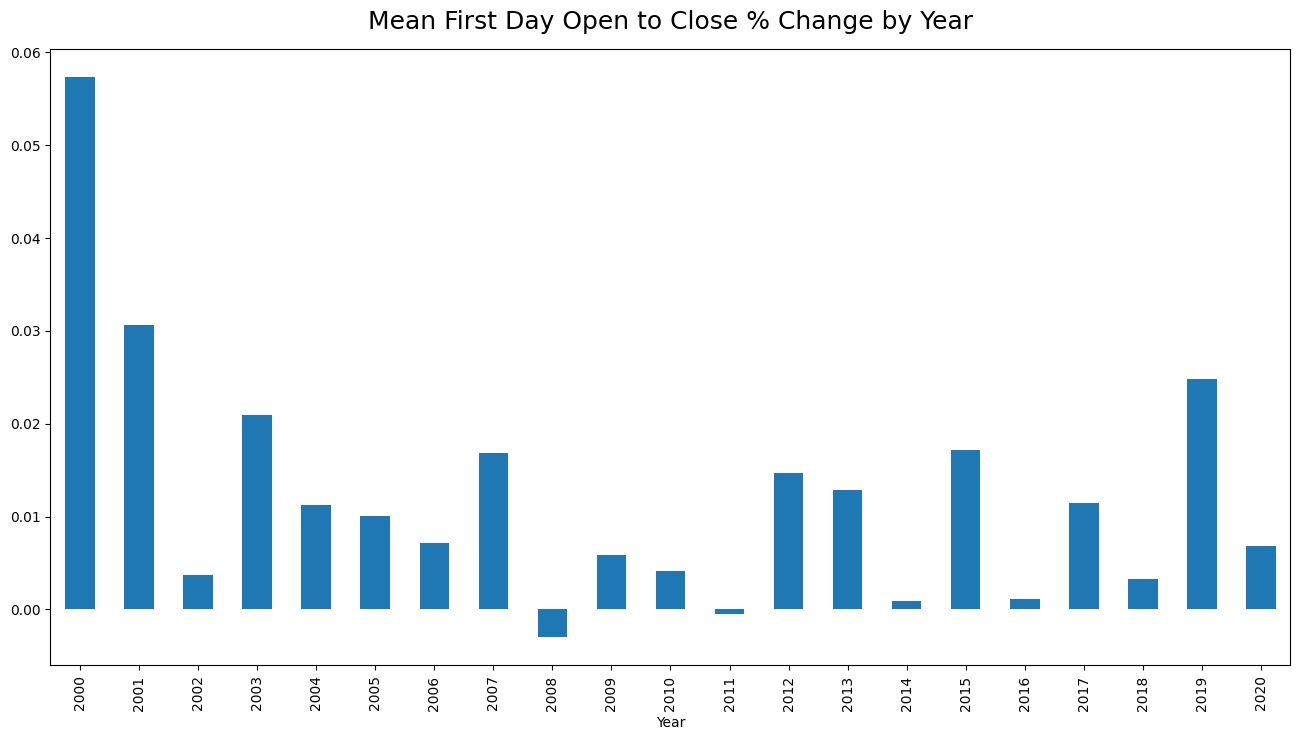

In [22]:
fig, ax = plt.subplots(figsize=(16,8))
df.groupby('Year')['1st Day Open to Close $ Chg'].mean().plot(kind='bar',ax=ax)
ax.set_title('Mean First Day Open to Close % Change by Year',fontdict={'size':18},y=1.02)

In [23]:
# Baseline IPO Strategy-> assuming we buy one lot in all the IPOs
# looking at dollar prices
df['1st Day Open to Close $ Chg']=(df['1st Day Close']-df['Opening Price'])
df[df['Year']==2020].sum(numeric_only=True)


Offer Price                      2814.230000
Opening Price                    3595.120000
1st Day Close                    3629.863000
1st Day % Chg                      42.221212
$ Chg Open                        780.890000
$ Chg Close                       815.633000
Year                           412080.000000
Month                            1222.000000
Day                              3091.000000
Day of Week                       619.000000
1st Day Open to Close $ Chg        34.743000
dtype: float64

In [24]:
df[df['Year']==2020]['1st Day Open to Close $ Chg'].describe()

count    204.000000
mean       0.170309
std        3.249581
min       -8.900000
25%       -0.350000
50%        0.000000
75%        0.165000
max       20.590000
Name: 1st Day Open to Close $ Chg, dtype: float64

<Axes: ylabel='Frequency'>

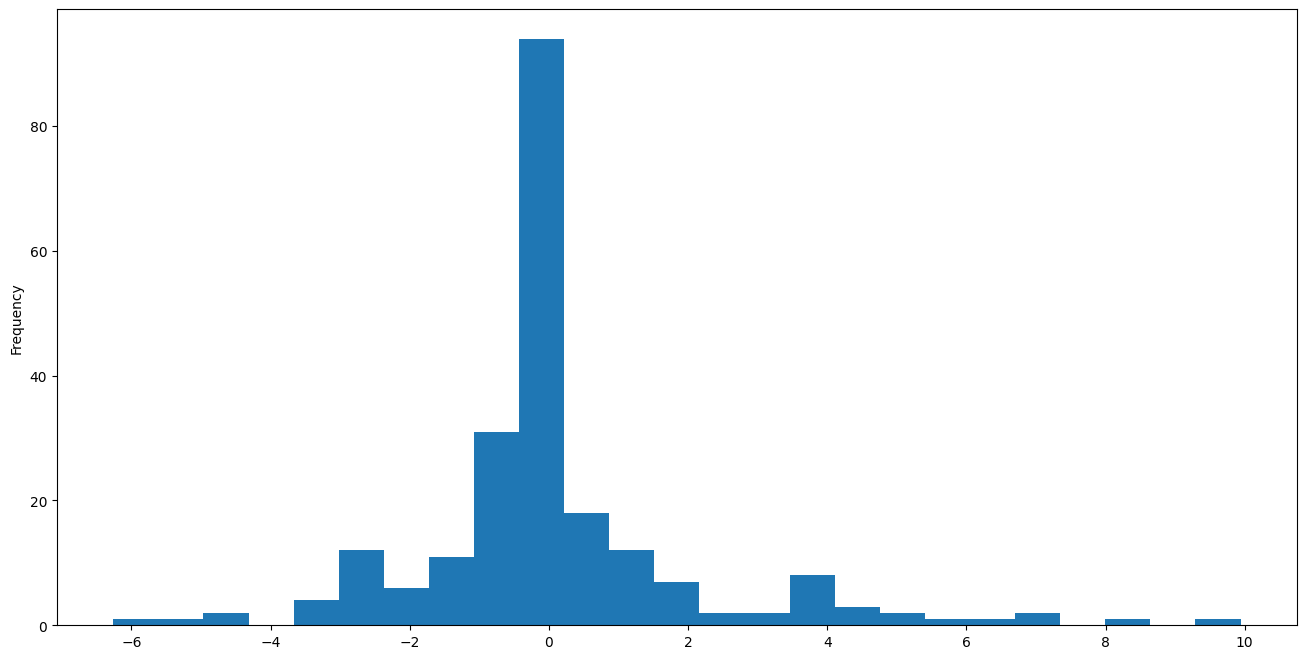

In [25]:
#checking distribution of returns for the IPOs
fig, ax=plt.subplots(figsize=(16,8))
df[df['Year']==2018]['1st Day Open to Close $ Chg'].plot(kind='hist',bins=25,ax=ax)
#we suspect to find some commanalities in right tail ipos using ML to maximise our returns

In [26]:
df[df['Year']==2020]['1st Day Open to Close $ Chg'].head(15)

0    -2.00
1     0.60
2     0.00
3    -0.34
4    -0.07
5     0.02
6    -0.75
7     2.96
8     6.48
9     4.07
10   -1.25
11    1.05
12    0.01
13   -5.25
14   -1.00
Name: 1st Day Open to Close $ Chg, dtype: float64

# Feature Engineering

In [27]:
#explore feature engineering to target right tail IPOs
#Adding feature-> Diff opening price and offer price-> referred as 'Opening Gap'
df['Opening Gap % Chg']=(df['Opening Price']-df['Offer Price']/df['Offer Price'])

#Maybe having more than 1 underwrites impacts IPOs returns

def get_mgr_count(x):
    return len(x.split('/'))
df['Mgr Count'] = df['Managers'].apply(get_mgr_count)


In [28]:
#Using visualisation to check our hypothesis of Mgr count
df.groupby('Mgr Count')['1st Day Open to Close $ Chg'].mean().to_frame().style.bar(align='mid',color=['#d65f5f','#5fba7d'])

,1st Day Open to Close $ Chg
Mgr Count,
1,0.293678
2,0.276348
3,0.209083
4,0.278996
5,0.096087
6,-0.058333
7,0.052500
8,0.057273
9,-0.683750


In [29]:
#Perhaps lead underwriter are important let us get them extracted
df['Lead Mgr'] = df['Managers'].apply(lambda x: x.split('/')[0])
df['Lead Mgr'].unique()

array(['Jefferies', 'Credit Suisse', 'Citigroup',
       'Wells Fargo Securities', 'Deutsche Bank Securities',
       'WestPark Capital',
       'ThinkEquity (a division of Fordham Financial Management )',
       'J.P. Morgan', 'Goldman Sachs', 'EarlyBirdCapital',
       'Morgan Stanley', 'Barclays', 'Raymond James', 'Stephens',
       'Imperial Capital', 'Maxim Group LLC', 'Alexander Capital',
       'Chardan', 'I-Bankers Securities', 'JPMorgan', 'Benchmark Company',
       'Cantor', 'BofA Securities', 'Roth Capital Partners',
       'Boustead Securities', 'Nomura', 'B. Riley FBR', 'Cowen',
       'Goldman Sachs (Asia)',
       'ThinkEquity (a division of Fordham Financial Management) ',
       'Piper Sandler', 'AMTD', 'UBS Investment Bank', ' AMTD', 'BTIG',
       'The Benchmark Company', 'Ladenburg Thalmann',
       'ThinkEquity (a division of Fordham Financial Management)',
       'Stifel', 'Credit Suisse. Citigroup', ' I-Bankers Securities',
       'Maxim Group', 'Mizuho Securitie

In [30]:
# Ideally we shall consider this stage for cleaning data since few underwriter are same but are written differently for example
#J.P. Morgan and JPMorgan
#But will proceed without doing it


In [31]:
#We will use conjuction of simple linear regression and logistic function to get probality of success (sort of!)
#Caution this toy project is not intended for investment advice purposes rather educational purpose

#will use Sci-kit learn libary but will need to prepare datset to use scikit learn

from patsy import dmatrix

In [32]:
# Will decide an IPO is worth investing if it has more than or equal to 2.5% on day one.
#creating target variable

y = df['1st Day Open to Close $ Chg'].apply(lambda x:1 if x>0.25 else 0)

In [33]:
#setting up predictor variables using patsy
x = dmatrix("Q('Opening Gap % Chg') + C(Q('Month'),Treatment)+C(Q('Day of Week'),Treatment)+Q('Mgr Count')+Q('Lead Mgr')+Q('Offer Price')+C(Q('Star Rating'),Treatment)",df,return_type='dataframe')

In [34]:
x

,Intercept,"C(Q('Month'), Treatment)[T.2]","C(Q('Month'), Treatment)[T.3]","C(Q('Month'), Treatment)[T.4]","C(Q('Month'), Treatment)[T.5]","C(Q('Month'), Treatment)[T.6]","C(Q('Month'), Treatment)[T.7]","C(Q('Month'), Treatment)[T.8]","C(Q('Month'), Treatment)[T.9]","C(Q('Month'), Treatment)[T.10]",...,Q('Lead Mgr')[T.​Jefferies],"C(Q('Star Rating'), Treatment)[T.2.0]","C(Q('Star Rating'), Treatment)[T.3.0]","C(Q('Star Rating'), Treatment)[T.4.0]","C(Q('Star Rating'), Treatment)[T.5.0]","C(Q('Star Rating'), Treatment)[T.N/C]","C(Q('Star Rating'), Treatment)[T.NC]",Q('Opening Gap % Chg'),Q('Mgr Count'),Q('Offer Price')
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,13.7500,2.0,14.00
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0300,2.0,11.00
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.5000,3.0,13.50
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.8500,3.0,13.00
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.5200,1.0,10.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3597,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,20.9375,1.0,16.00
3598,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,21.0625,2.0,20.00
3599,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.0000,1.0,10.69
3600,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,9.5625,1.0,9.50


In [35]:
# train-test split
from sklearn.linear_model import LogisticRegression

x_train = x[:-200]
y_train = y[:-200]

x_test = x[-200:]
y_test=y[-200:]

clf= LogisticRegression(solver='lbfgs', max_iter=1000)
clf.fit(x_train,y_train)

LogisticRegression(max_iter=1000)

## Examining Model performance

In [36]:
y_hat= clf.predict(x_test)
y_true=y_test

pdf=pd.DataFrame({'y_true':y_true,'y_hat':y_hat})
pdf['correct']=pdf.apply(lambda x: 1 if x['y_true']==x['y_hat'] else 0,axis=1)
pdf

,y_true,y_hat,correct
3402,1,1,1
3403,0,0,1
3404,0,0,1
3405,0,0,1
3406,0,0,1
...,...,...,...
3597,1,1,1
3598,1,0,0
3599,1,0,0
3600,0,1,0


In [37]:
#Checking of which test IPOs we shall have invested
pdf['y_true'].value_counts(normalize=True)
#observation-> just north of half of the IPOs rose over 2.5%

y_true
1    0.515
0    0.485
Name: proportion, dtype: float64

In [38]:
pdf['correct'].value_counts(normalize=True)

correct
1    0.545
0    0.455
Name: proportion, dtype: float64

In [39]:
#in financial model expectancy is important than accuracy
results = pd.merge(df[['1st Day Open to Close $ Chg']],pdf,left_index=True,right_index=True)
results

,1st Day Open to Close $ Chg,y_true,y_hat,correct
3402,9.125000,1,1,1
3403,-15.875000,0,0,1
3404,-1.343750,0,0,1
3405,-2.062500,0,0,1
3406,-1.234375,0,0,1
...,...,...,...,...
3597,1.375000,1,1,1
3598,2.437500,1,0,0
3599,1.375000,1,0,0
3600,-0.687500,0,1,0


In [40]:
#if we had bought 1 share of each of the IPO in test

results['1st Day Open to Close $ Chg'].sum()

215.71875

In [41]:
results['1st Day Open to Close $ Chg'].describe()
#Observation-> we could lowest loss is mi -15.8% let see if how our model fare against such cases

count    200.000000
mean       1.078594
std        4.136920
min      -15.875000
25%       -0.578125
50%        0.312500
75%        1.902344
max       20.609375
Name: 1st Day Open to Close $ Chg, dtype: float64

In [42]:
#checking the IPOs our model suggested to buy
results[results['y_hat']==1]['1st Day Open to Close $ Chg'].sum()

93.65625

In [43]:
results[results['y_hat']==1]['1st Day Open to Close $ Chg'].describe()

count    36.000000
mean      2.601562
std       6.197098
min      -9.875000
25%      -0.218750
50%       1.000000
75%       5.671875
max      20.609375
Name: 1st Day Open to Close $ Chg, dtype: float64

## Generating importance of feature from our model

In [44]:
#clf.coef_

In [47]:
#let us play with the value of coefficients our regression has provided
fv=pd.DataFrame(x_train.columns,clf.coef_.T.flatten()).reset_index()
fv.columns=['Coef','Feature']
fv.sort_values('Coef',ascending=0).reset_index(drop=True)

,Coef,Feature
0,1.436517,Q('Lead Mgr')[T.BMO Capital Markets]
1,1.164694,Q('Lead Mgr')[T.Wachovia Securities]
2,1.122179,Q('Lead Mgr')[T.Laidlaw & Company (UK) Ltd.]
3,1.095419,Q('Lead Mgr')[T. J.P. Morgan]
4,0.913518,Q('Lead Mgr')[T.ViewTrade Securities]
...,...,...
355,-0.930101,Q('Lead Mgr')[T.Cantor]
356,-1.078982,Q('Lead Mgr')[T.EarlyBirdCapital]
357,-1.136698,Q('Lead Mgr')[T.Morgan Joseph]
358,-1.217960,Q('Lead Mgr')[T.Chardan]
